In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from epimodels.continuous.models import SIR
from ipywidgets import interact, FloatSlider, IntSlider

In [2]:
# SIR model differential equations
def sir_model(t, y, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

def solve_sir(beta, gamma, pop, n_days):
    N = 1.0

    # as fractions
    I0 = 1/pop
    R0 = 0.0
    S0 = N - I0 - R0

    t_span = (0, n_days)
    t_eval = np.linspace(*t_span, 500)

    sol = solve_ivp(
        fun=lambda t, y: sir_model(t, y, beta, gamma),
        t_span=t_span,
        y0=[S0, I0, R0],
        t_eval=t_eval
    )
    return sol
def wrapper_for_inter(beta, gamma):
    pop = 1000
    n_days = 100
    sol = solve_sir(beta, gamma, pop, n_days)
    orig = SIR()
    orig([pop-1, 1, 0], [0, n_days], pop, {'beta': beta, 'gamma': gamma})
    a = orig.run([pop-1, 1, 0], [0, n_days], pop, {'beta': beta, 'gamma': gamma})
    plt.plot(sol.t, sol.y[0]*pop, label="Susceptible")
    plt.plot(sol.t, sol.y[1]*pop, label="Infected")
    plt.plot(sol.t, sol.y[2]*pop, label="Recovered")
    plt.plot(a.t, a.y[0], label="S")
    plt.plot(a.t, a.y[1], label="I")
    plt.plot(a.t, a.y[2], label="R")
    plt.plot
    plt.xlabel("Time (days)")
    plt.ylabel("Population fraction")
    plt.legend()
    plt.title("SIR Model Simulation")
    plt.grid(True)
    plt.show()

In [ ]:
interact(wrapper_for_inter,
         beta = FloatSlider(value=0.5, min=0.1, max=5, step=0.1),
         gamma = FloatSlider(value=0.1, min=0, max=1, step=0.1))

interactive(children=(FloatSlider(value=0.5, description='beta', max=5.0, min=0.1), FloatSlider(value=0.1, des…

<function __main__.wrapper_for_inter(beta, gamma)>

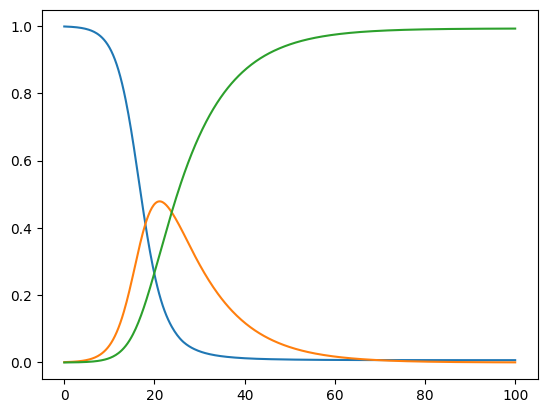

In [19]:
pop = 1000
n_days = 100
sol = solve_sir(0.5, 0.1, pop, n_days)
orig = SIR()
plt.plot(sol.t, sol.y[0], label="Susceptible")
plt.plot(sol.t, sol.y[1], label="Infected")
plt.plot(sol.t, sol.y[2], label="Recovered")
plt.show()